# Homework 4 (100 points)
* Download the file vvk160_hw4.ipynb
* Open the file via Jupyter Notebook
* Run the code by clicking the “Run” button

In [2]:
#import necessary modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from math import factorial
import scipy.stats as stats
import numpy.random as rn
import pdb

## Question 1 (hypothesis testing) 20pts
*  If you flip the coin 15 times, and observed 12 heads, how likely this is a fair coin? A loaded coin tends to give head or tail more frequently. We set the p-value to be 0.05. We have the following statistical hypothesis testing 

In [11]:
#We assume H0 is correct, then we can calculate the probability P(at least 12 heads or 12 tails | coin is fair)

def nchoosek(n,k):
    return factorial(n)/factorial(k)/factorial(n-k)
def binomPMF(k,n,p):
    return nchoosek(n,k)*p**k*(1-p)**(n-k)
print("2*(binomPMF(12,15,0.05)+binomPMF(15,15,0.05))=",2*(binomPMF(12,15,0.05)+binomPMF(15,15,0.05)))
print( "\nCORRECT ANSWER: 2*( binom.pmf(12, 15, 0.5) + binom.pmf(13, 15, 0.5)+ binom.pmf(14, 15, 0.5)+ binom.pmf(15,15, 0.5))")

2*(binomPMF(12,15,0.05)+binomPMF(15,15,0.05))= 1.904813232421876e-13

CORRECT ANSWER: 2*( binom.pmf(12, 15, 0.5) + binom.pmf(13, 15, 0.5)+ binom.pmf(14, 15, 0.5)+ binom.pmf(15,15, 0.5))


In [4]:
#If the value is smaller than the p-value 0.05, do you accept or reject H0

print("we reject H0")

we reject H0


## Question 2 (statistics) 60pts
* Write a program to simulate an experiment of tossing a fair coin 16 times and counting the number of heads. Repeat this experiment 105 times to obtain the number of heads for every 16 tosses; save the number of heads in a vector of size 105 (nHeads). You should be able to do this in just a few lines. (Use np.random.uniform to generate a 2d array of 105 * 16 random numbers between 0 and 1; a value that is greater than 0.5 is considered a “head”.) Complete the following questions. 

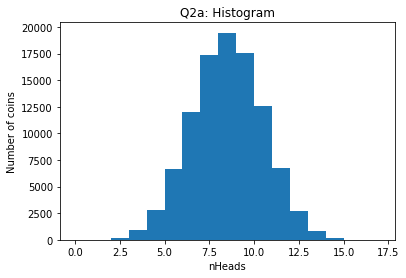

In [5]:
#Plot the histogram of nHeads using plt.hist, with parameter bins = range(18)
np.random.seed(0)
N = 16
m = 10**5
nHeads = np.array([])
nHeads = (np.random.uniform(size=(m, N))>0.5).sum(1)
#plot the histgram
plt.hist(nHeads,bins=range(18))
plt.xlabel('nHeads')
plt.ylabel('Number of coins')
plt.title('Q2a: Histogram')
plt.show()

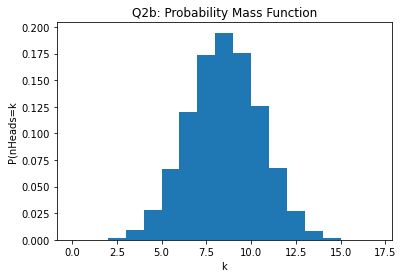

In [6]:
#Plot the PMF using plt.hist with parameter bins and density
hist=plt.hist(nHeads,bins=range(18),density=True)
plt.xlabel('k')
plt.ylabel('P(nHeads=k')
plt.title('Q2b: Probability Mass Function')
plt.show()

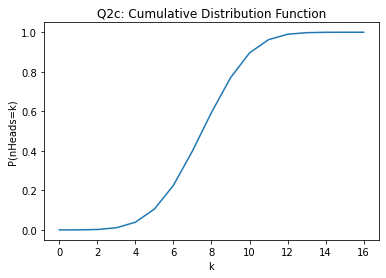

In [7]:
'''Calculate the probability of having NO MORE THAN k heads out of 16 tosses, where k = 0, 1, 2, … 15, 16.
Plot this as a CDF (it accumulates the probabilities <= k). You can calculate the probabilities again or using values returned from a or b.)'''

cdf=np.cumsum(hist[0])
plt.plot(range(17),cdf)
plt.xlabel('k')
plt.ylabel('P(nHeads=k)')
plt.title('Q2c: Cumulative Distribution Function')
plt.show()

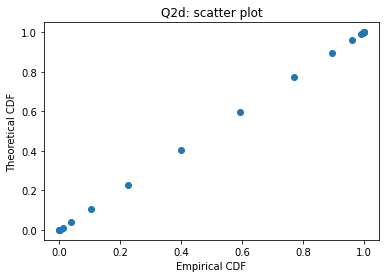

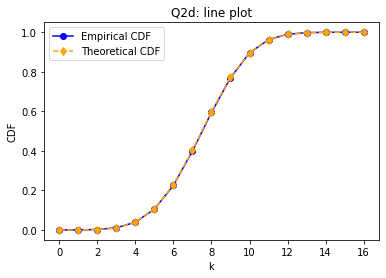

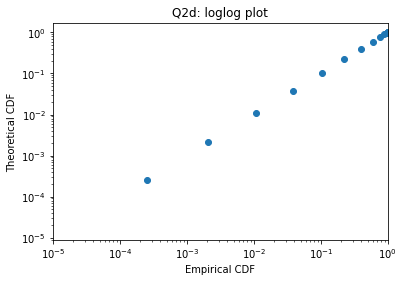

In [8]:
'''Use the binomial distribution CDF (use scipy.stats.binom.cdf) to compute the probability of having NO MORE THAN k heads out of 16 tosses, where k = 0, 1, 2, …, 15, 16 and compare these probabilities with the probabilities you obtained in subquestion c.
(Plot the probabilities you obtained from the simulation results in subquestion c (empirical calculation) against the probabilities from your calculation here (theoretical calculation), as a scatter plot and line graph. 
Plot in loglog scale to visualize small probabilities.)'''

result=[]
for i in range(17):
    result.append(stats.binom.cdf(i, 16, 0.5))

# scatter plot
plt.scatter(cdf,result)
plt.xlabel('Empirical CDF')
plt.ylabel('Theoretical CDF')
plt.title('Q2d: scatter plot')
plt.show()

# line plot
plt.plot(range(17),cdf,'o-',color='blue')
plt.plot(range(17),result,'d--',color='orange')
plt.xlabel('k')
plt.ylabel('CDF')
plt.title('Q2d: line plot')
plt.legend(['Empirical CDF','Theoretical CDF'])
plt.show()

# Loglog scale plot
plt.loglog()
scatter=plt.scatter(cdf,result)
plt.xlim(10**-5, 1)
plt.xlabel('Empirical CDF')
plt.ylabel('Theoretical CDF')
plt.title('Q2d: loglog plot')
plt.show()

## Question 3 (linear regression) 20pts
* If the plot of n pairs of data (x , y) for an experiment appear to indicate a "linear relationship" between y and x, then the method of least squares may be used to write a linear relationship between x and y. 

* The least squares regression line is the line that minimizes the sum of the squares of the errors (SSE) from each data point to the line (see figure below). The least square regression line for the set of n data points is given by 𝑦 given by

* The sales of a company (in million dollars) for each year are shown in the table. Output your results by the print() function in Python.

The least square regression line is
y = -16830.4 + 8.4 * x


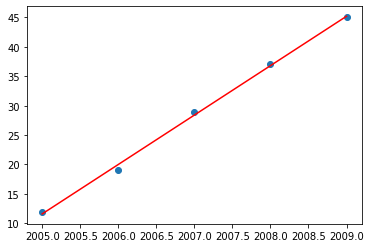

In [9]:
'''Write a Python code to find the least square regression line can write a Python code to calculate a and 45 y = 𝛽𝑥 + a.
You either 𝛽 based on the equations above or use the linear regression function in the model sklearn (described in the lecture) to get the results directly'''

x = np.array([2005,2006,2007,2008,2009])
y = np.array([12,19,29,37,45])
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
print("The least square regression line is\ny = -16830.4 + 8.4 * x")
y_prediction=model.coef_*x+model.intercept_
plt.scatter(x, y)
plt.plot(x,y_prediction.reshape(-1,1),color='r')

In [10]:
#Use the regression line as a model to estimate the sales of the company in 2012

y = -16830.4 + 8.4 * (2012)
y_up=round(y*1000000,5)
print(f"the estimated sales of the company in 2012 is ${round(y)}M or ${y_up}")

the estimated sales of the company in 2012 is $70M or $70400000.0
